In [45]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Add the target variable to the DataFrame
wine_df['target'] = wine.target
wine_df.head()

X = wine_df.drop('target',axis=1)
y = pd.DataFrame(data=wine.target, columns=['target'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0


In [56]:
# Ridge Regression
ridge = Ridge()  # You can adjust the alpha (regularization strength) as needed
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_pred = ridge.predict(X_test)
print("Ridge Mean Squared Error:", ridge_mse)

Ridge Mean Squared Error: 0.06810198955809448


In [ ]:
ridge_pred

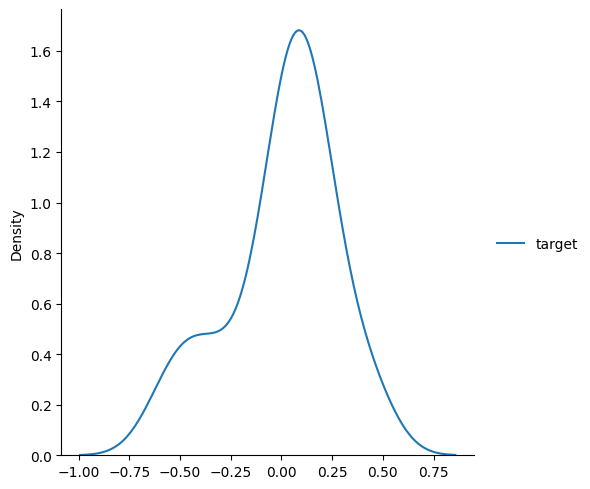

In [58]:
sns.displot(ridge_pred-y_test,kind="kde")

In [60]:
# Lasso Regression
lasso = Lasso()  # You can adjust the alpha (regularization strength) as needed
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

print("Lasso Mean Squared Error:", lasso_mse)

Lasso Mean Squared Error: 0.3265891960765337


In [65]:
lasso_predictions = lasso_predictions.reshape(-1,1)

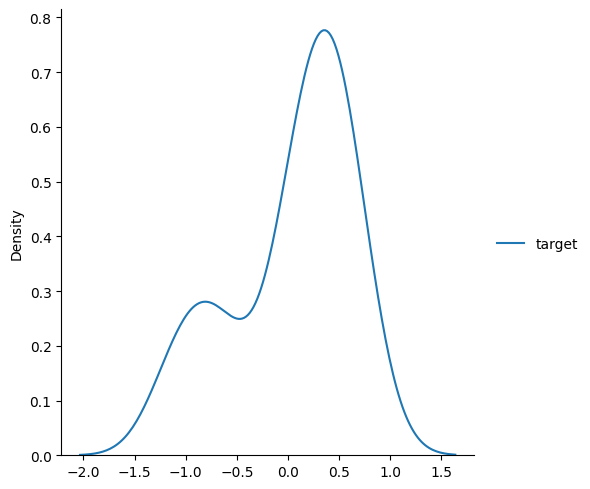

In [66]:
sns.displot(lasso_predictions-y_test,kind="kde")